# **Project 2: Applied Statistics**

**Domain**: Startup Ecosystem

**Context**: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world's
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience,
present in person and online.

**Data Description**: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company.

**Attributes**

 - Startup: Name of the company2
 - Product: Actual product
 - Funding: Funds raised by the company in USD
 - Event: The event the company participated in
 - Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
 - OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

## Load the dataset

In [2]:
comp = pd.read_csv('CompanyX_EU.csv')
comp.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


Check the datatypes of each attribute.

In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


## Data Processing

Check for null values in the attributes.

In [4]:
#columnwise number of null values
comp.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

Drop the null values

In [5]:
comp.dropna(inplace = True)
comp.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [6]:
comp.shape

(446, 6)

Convert the ‘Funding’ features to a numerical value.

In [7]:
comp.loc[:,'Funds_in_million'] = comp['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [8]:
comp.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


## Data Analysis

Plot box plot for funds in million

<Axes: ylabel='Funds_in_million'>

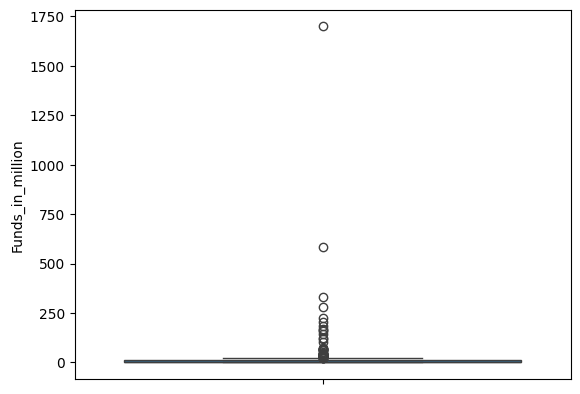

In [9]:
sns.boxplot(data=comp, y = 'Funds_in_million')

Check the number of outliers greater than the upper fence

In [10]:
Q1 = comp['Funds_in_million'].quantile(0.25)
Q3 = comp['Funds_in_million'].quantile(0.75)
IQR=Q3-Q1
#Outliers outside greater than Q3 + 1.5*Interquartile range
print('Count of Number of outliers above the upper fence: ' + str(comp.loc[comp['Funds_in_million']>(Q3+1.5*IQR)]['Funds_in_million'].count()))
print('Entire list of companies with Funds above the upper fence')
comp.loc[comp['Funds_in_million']>(Q3+1.5*IQR)]

Count of Number of outliers above the upper fence: 60
Entire list of companies with Funds above the upper fence


,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


Check frequency of the OperatingState features classes

In [11]:
comp['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

Statistical Analysis on funds raised by companies still operating vs companies that closed down

**Null Hypothesis H0**: There is no significant difference between funds raised by companies still operating vs companies that closed down.

i.e., Mean of Funds raised by Operating companies = Mean of funds raised by companies which closed down

**Alternate Hypothesis H1**: Mean of Funds raised by Operatinf companies <> Mean of funds raised by companies which closed down

Test for significance and conclusion

In [12]:
Funds_for_Operating_Comp = comp.loc[comp['OperatingState'].eq('Operating')]['Funds_in_million']
Funds_for_Closed_Comp = comp.loc[comp['OperatingState'].eq('Closed')]['Funds_in_million']

tstat, pvalue = ttest_ind(Funds_for_Operating_Comp,Funds_for_Closed_Comp)
print('t statistic: ' +str(tstat))
print('p value: ' +str(pvalue))
if(pvalue < 0.05):
  print('Since p value is less than significance level of 0.05, we reject the null hypothesis that the mean of the funds received by operating companies is equal to mean of the funds received by closed companies')
else:
  print('Since p value is greater than significance level of 0.05, we cannot reject the null hypothesis that the mean of the funds received by operating companies is equal to mean of the funds received by closed companies. So, the mean of the funds received by operating companies is NOT different from that received by closed companies')


t statistic: 1.1382924515740138
p value: 0.25572701885629406
Since p value is greater than significance level of 0.05, we cannot reject the null hypothesis that the mean of the funds received by operating companies is equal to mean of the funds received by closed companies. So, the mean of the funds received by operating companies is NOT different from that received by closed companies


Make a copy of the original data frame

In [13]:
#Copy dataframe for use in further questions
df = comp.copy()

In [14]:
#Made a copy while loading the dataframe to df
df.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


Check frequency distribution of Result variables

In [15]:
df['Result'].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [16]:
#Calcualte number of winners who are still operating
WinnersOperating = df.loc[((df['Result'].eq('Winner')) & (df['OperatingState'].eq('Operating')))]['OperatingState'].value_counts()[0]
Winners = df.loc[df['Result'].eq('Winner') ]['Result'].value_counts()[0]
#Calculate number of contestants who are still operating
ContestantsOperating = df.loc[((df['Result'].eq('Contestant')) & (df['OperatingState'].eq('Operating')))]['OperatingState'].value_counts()[0]
Contestants = df.loc[df['Result'].eq('Contestant') ]['Result'].value_counts()[0]
#Print percentage of winners and contestants who are still operating
print('Percentage of winners that are still operating: '+str(np.round(WinnersOperating*100/Winners,2)) +'%')
print('Percentage of contestants that are still operating: '+str(np.round(ContestantsOperating*100/Contestants,2))+'%')


Percentage of winners that are still operating: 72.0%
Percentage of contestants that are still operating: 68.59%


Statistical Analysis on proportion of winners that are still operating and proportion of contestants who are still operating

**Null Hypothesis H0**: There is no significant difference between proportion of winners that are still operating and proportion of contestants who are still operating.

i.e., Proportion of winners who are Operating p1 = Proportion of contestants who are still operating p2

**Alternate Hypothesis H1**: Proportion of winners who are Operating p1 <> Proportion of contestants who are still operating p2

Test for significance and conclusion

Z-stat for comparing proportions:

Z = (p1hat - p2hat)/SQRT(phat*(1-phat)*((1/n1) + (1/n2)))

phat = (n1*p1hat + n2*phat2)/(n1 + n2) = (x1 + x2)/(n1 + n2)

In [17]:
#Using the Z-stat for proportions
p1hat = WinnersOperating/Winners
p2hat = ContestantsOperating/Contestants

phat = (Winners*p1hat + Contestants*p2hat)/(Winners + Contestants)
zstat = (p1hat - p2hat)/np.sqrt(phat*(1 - phat)*(1/Winners + 1/Contestants))
print(zstat)
critical_value = stats.norm.ppf(1 - 0.05)
print(critical_value)
print('z statistic: ' +str(zstat))
print('critical value: ' +str(critical_value))
print('pvalue: '+ str(1 - stats.norm.cdf(zstat)))
if(pvalue < 0.05):
  print('Since zstat is in the rejection regionfor significance level of 0.05, we reject the null hypothesis that there is no significant difference between proportion of winners that are still operating and proportion of contestants who are still operating')
else:
  print('Since zstat is not in the rejection region for significance level of 0.05, we cannot reject the null hypothesis that there is no significant difference between proportion of winners that are still operating and proportion of contestants who are still operating. So, the proportion of winners is NOT different from the proportion of contestants')


0.3542506401722957
1.6448536269514722
z statistic: 0.3542506401722957
critical value: 1.6448536269514722
pvalue: 0.36157552780971236
Since zstat is not in the rejection region for significance level of 0.05, we cannot reject the null hypothesis that there is no significant difference between proportion of winners that are still operating and proportion of contestants who are still operating. So, the proportion of winners is NOT different from the proportion of contestants


Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [18]:
#Get companies where Event contains Disrupt
disrupt_ind = pd.DataFrame(df['Event'].str.contains("Disrupt"))
#Get companies where the year in Event is greater than 2013
year_ind = pd.DataFrame(pd.to_numeric(df['Event'].str[-4:], errors = 'coerce') >= 2013)

#Select only the Event with Disrupt keyword and year from 2013 onwards
df[(disrupt_ind['Event'] == True) & (year_ind['Event'] == True)]['Event'].unique()

array(['Disrupt NYC 2013', 'Disrupt NY 2016', 'Disrupt SF 2015',
       'Disrupt London 2016', 'Disrupt NYC 2014', 'Disrupt EU 2013',
       'Disrupt SF 2014', 'Disrupt SF 2013', 'Disrupt NY 2015',
       'Disrupt SF 2016', 'Disrupt London 2015', 'Disrupt EU 2014'],
      dtype=object)

In [19]:
#To print the entire dataset with Disrupt and year 2013 onwards
df[(disrupt_ind['Event'] == True) & (year_ind['Event'] == True)]

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.000
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1.000
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.750
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,11.600
...,...,...,...,...,...,...,...
641,Workspot,workspot.com,$15.8M,Disrupt NYC 2013,Contestant,Operating,15.800
642,Xendo,xendo.com,$28K,Disrupt SF 2014,Contestant,Acquired,0.028
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.900
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating,583.600
